# Hybrid Recommender System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
steam_df = pd.read_csv(r"C:\Mostafa\Learnning\Steam\DataSets\Raw\steam.csv")

In [3]:
# Load content-based similarity matrix
content_similarity_df = pd.read_pickle(r"C:\Mostafa\Learnning\Steam\Models\content_similarity_df.pkl")

# Load collaborative filtering similarity matrix
collab_similarity_df = pd.read_pickle(r"C:\Mostafa\Learnning\Steam\Models\collab_similarity_df.pkl")

In [4]:
def hybrid_recommend(game_name, n=5, alpha=0.5):
    """
    Recommends games using a hybrid of content and collaborative filtering.
    alpha: weight for content-based (0.0 to 1.0)
    """
    if game_name not in content_similarity_df.index or game_name not in collab_similarity_df.index:
        return f"Game '{game_name}' not found in both models."

    # Get similarity scores from both systems
    content_scores = content_similarity_df[game_name]
    collab_scores = collab_similarity_df[game_name]

    # Combine with weighting
    hybrid_scores = alpha * content_scores + (1 - alpha) * collab_scores

    # Drop itself and return top N
    hybrid_scores = hybrid_scores.drop(game_name)
    return hybrid_scores.sort_values(ascending=False).head(n)
print(type(hybrid_recommend))


<class 'function'>


In [5]:
hybrid_recommend("Portal", n=5, alpha=0.6)

name
Portal 2                      0.410204
Quantum Conundrum             0.351272
Stacking                      0.309657
Bully: Scholarship Edition    0.226507
Hydrophobia: Prophecy         0.225372
Name: Portal, dtype: float64

Hybrid Score Distribution

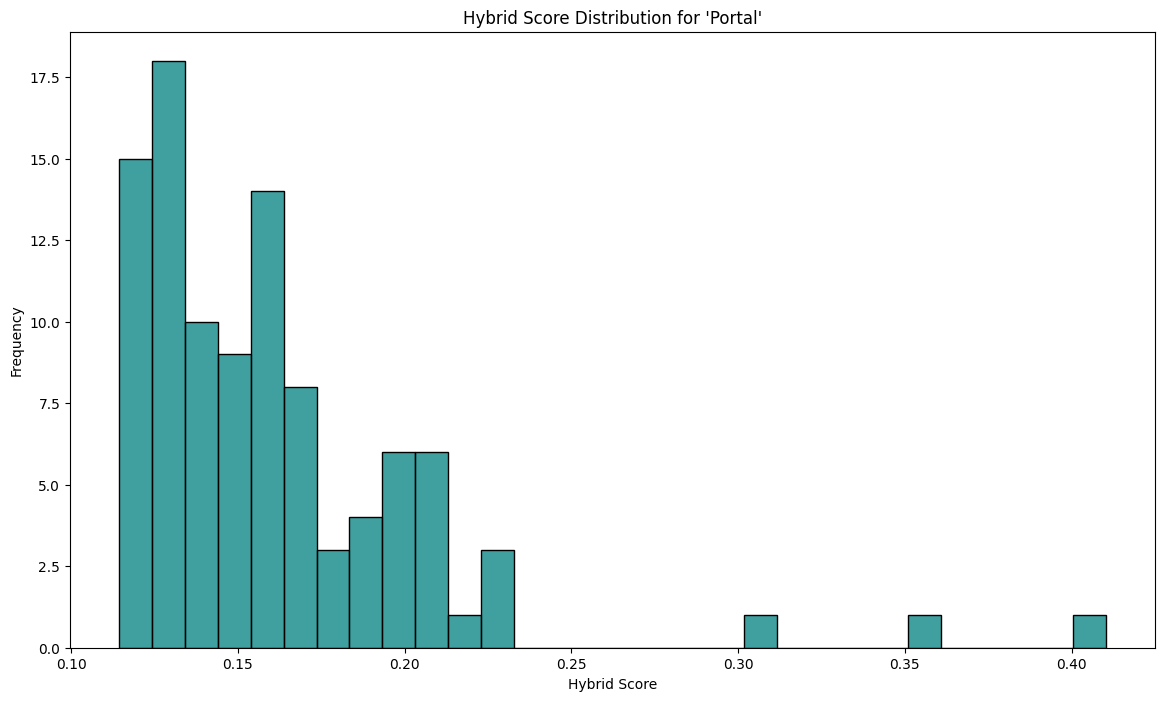

In [6]:
# Test with a single game
sample_game = "Portal"
hybrid_scores = hybrid_recommend(sample_game, n=100, alpha=0.6)

# Convert to DataFrame for plotting
hybrid_df = hybrid_scores.reset_index()
hybrid_df.columns = ["game", "score"]

# Plot the histogram
plt.figure(figsize=(14, 8))
sns.histplot(hybrid_df["score"], bins=30, color="teal")
plt.title(f"Hybrid Score Distribution for '{sample_game}'")
plt.xlabel("Hybrid Score")
plt.ylabel("Frequency")
plt.show()


Impact of Alpha on Recommendations

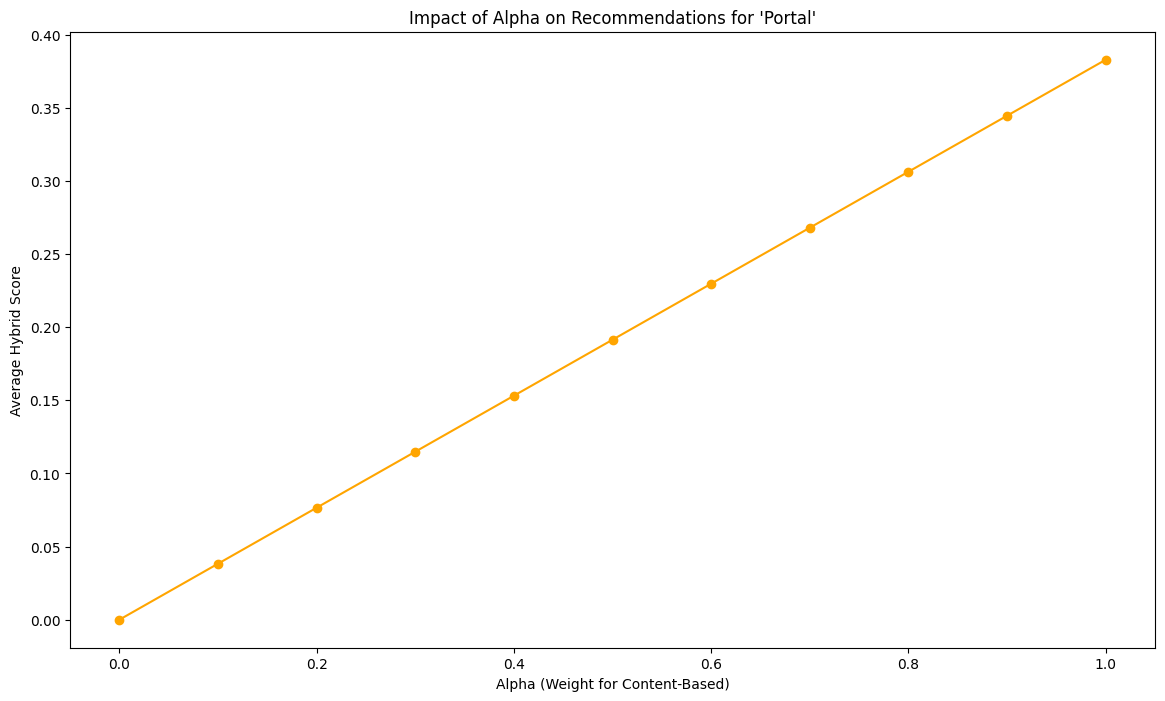

In [7]:
alphas = np.linspace(0, 1, 11)
scores = []

for alpha in alphas:
    hybrid_scores = hybrid_recommend(sample_game, n=20, alpha=alpha)
    scores.append(sum(hybrid_scores) / len(hybrid_scores))

plt.figure(figsize=(14, 8))
plt.plot(alphas, scores, marker='o', color='orange')
plt.title(f"Impact of Alpha on Recommendations for '{sample_game}'")
plt.xlabel("Alpha (Weight for Content-Based)")
plt.ylabel("Average Hybrid Score")
plt.show()

Top 20 Similar Games

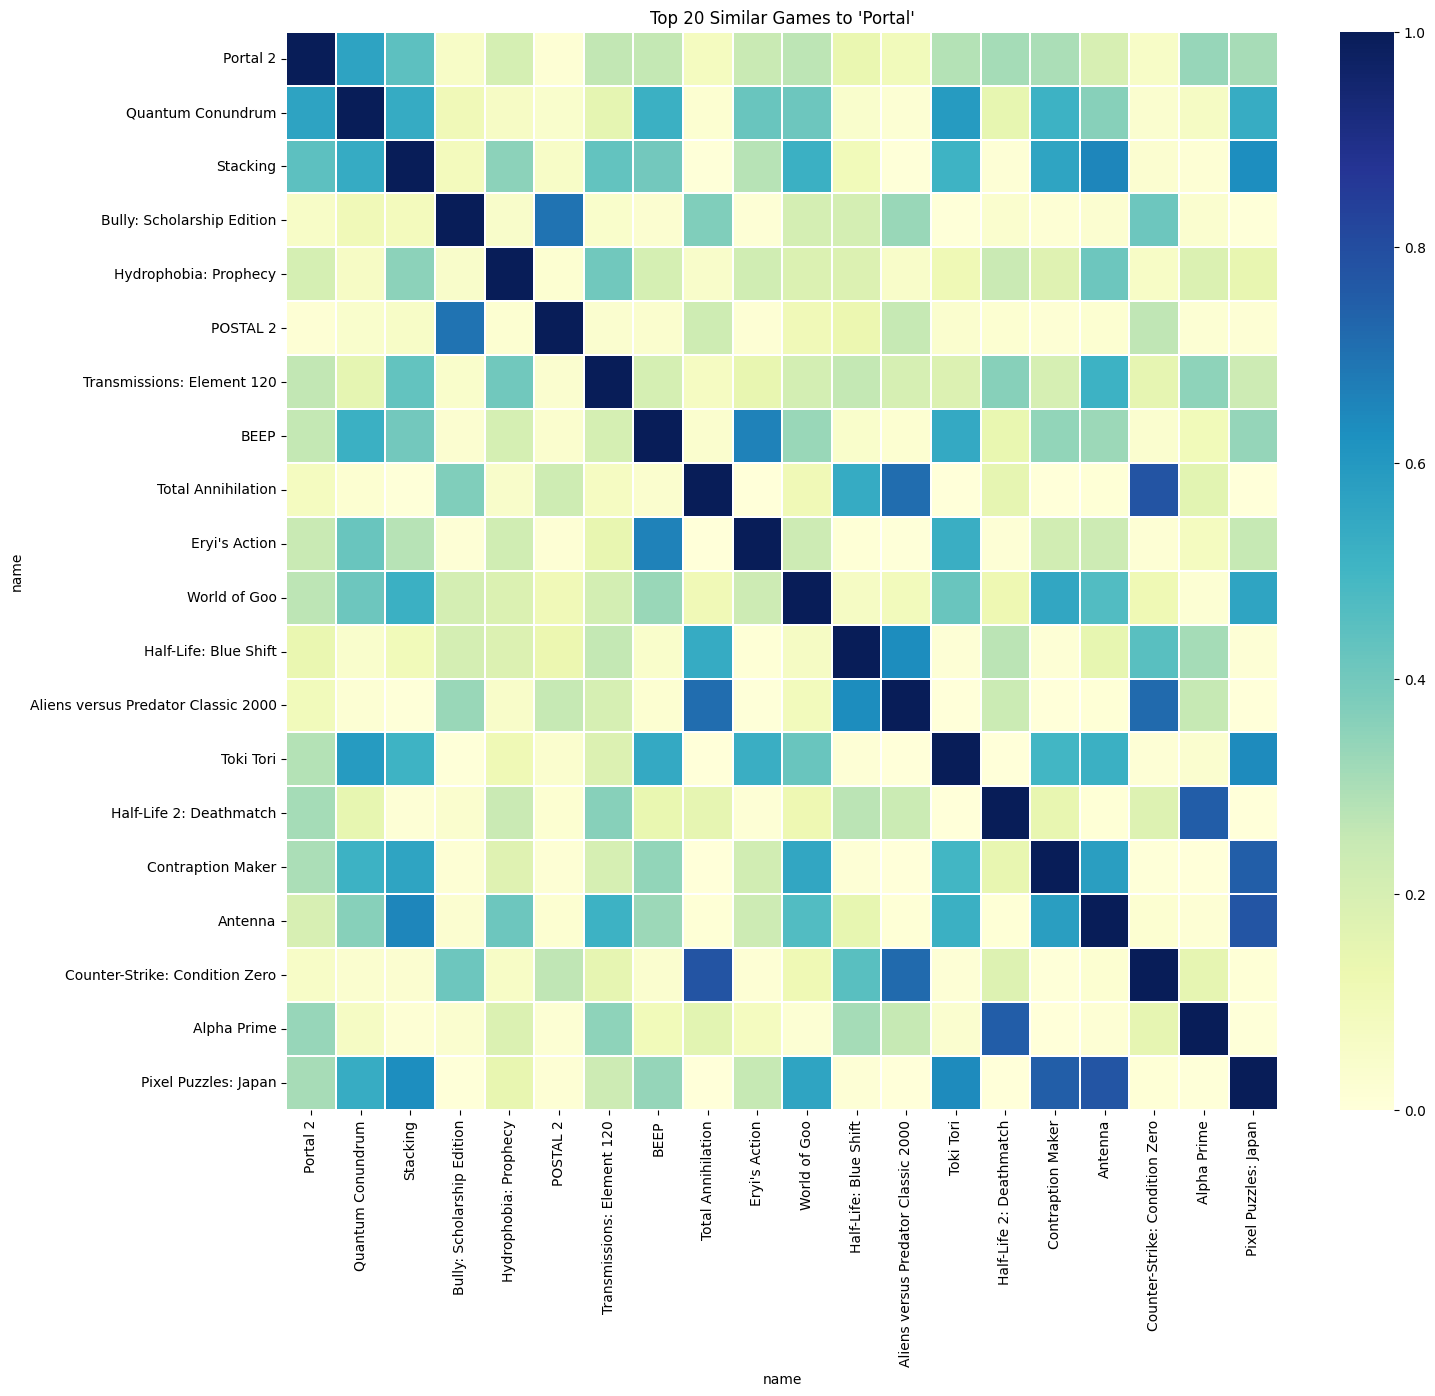

In [8]:
# Get top 20 recommendations
top_recommendations = hybrid_recommend(sample_game, n=20, alpha=0.6)

# Extract the game names from the index
recommended_games = top_recommendations.index.tolist()

# Create a small similarity matrix for just these games
similarity_matrix = content_similarity_df.loc[recommended_games, recommended_games]

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(similarity_matrix, cmap="YlGnBu", linewidths=0.1)
plt.title(f"Top 20 Similar Games to '{sample_game}'")
plt.show()


Hybrid Score vs Average Rating

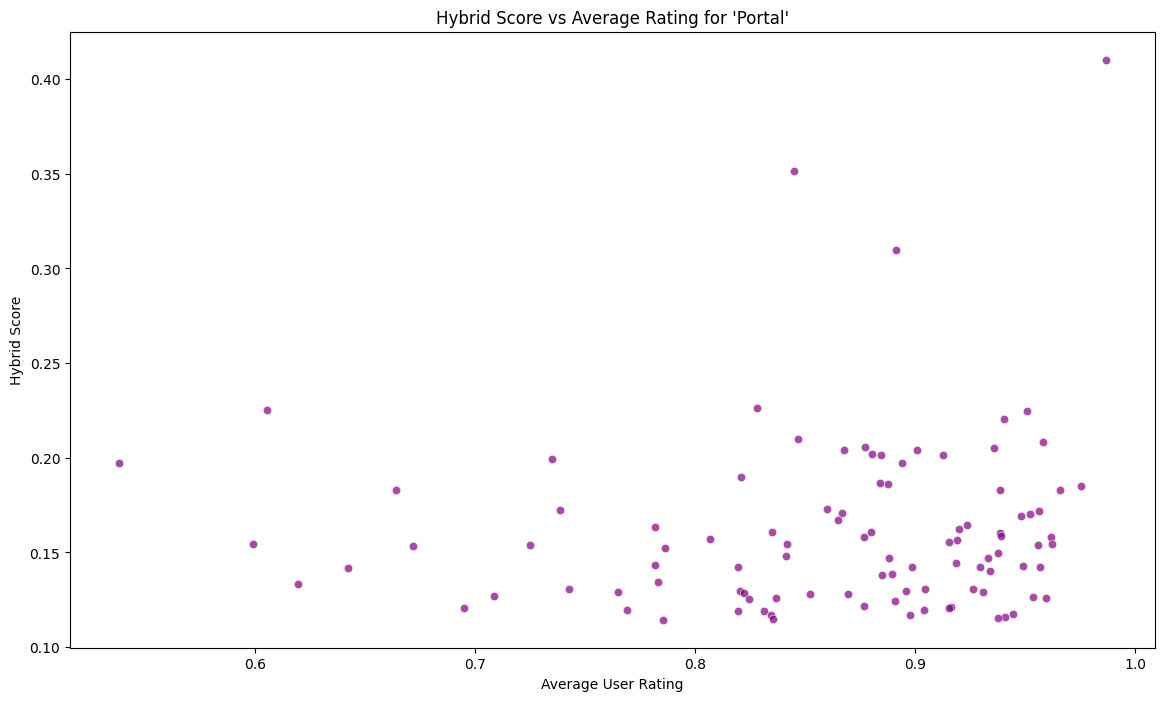

In [9]:
# Merge with average ratings
# Create a separate copy to avoid the warning
average_ratings = steam_df[['name', 'positive_ratings', 'negative_ratings']].copy()

# Calculate average ratings
average_ratings['average_rating'] = average_ratings['positive_ratings'] / (average_ratings['positive_ratings'] + average_ratings['negative_ratings'])
merged_scores = hybrid_df.merge(average_ratings, left_on="game", right_on="name", how="left")

plt.figure(figsize=(14, 8))
sns.scatterplot(x="average_rating", y="score", data=merged_scores, alpha=0.7, color='purple')
plt.title(f"Hybrid Score vs Average Rating for '{sample_game}'")
plt.xlabel("Average User Rating")
plt.ylabel("Hybrid Score")
plt.show()
